# Exercises

In [2]:
%matplotlib inline
import numpy as np
import matplotlib as plt
import pandas as pd
import math
import datetime

## 1. What was the average age in male and female athletes?

In [3]:
athlete=pd.read_csv('athletes.csv')
countries=pd.read_csv('countries.csv')
athlete.head()
countries.head()
country_name=countries['country']
country_code=countries['code']
country_dict={}
for i in range(0,len(country_name)):
    country_dict[country_code[i]]=country_name[i]
print(athlete)
countries['nationality']=countries['code']
del countries['code']

              id                      name nationality     sex       dob  \
0      736041664            A Jesus Garcia         ESP    male  10/17/69   
1      532037425                A Lam Shin         KOR  female   9/23/86   
2      435962603               Aaron Brown         CAN    male   5/27/92   
3      521041435                Aaron Cook         MDA    male    1/2/91   
4       33922579                Aaron Gate         NZL    male  11/26/90   
5      173071782               Aaron Royle         AUS    male   1/26/90   
6      266237702             Aaron Russell         USA    male    6/4/93   
7      382571888             Aaron Younger         AUS    male   9/25/91   
8       87689776       Aauri Lorena Bokesa         ESP  female  12/14/88   
9      997877719           Ababel Yeshaneh         ETH  female   7/22/91   
10     343694681               Abadi Hadis         ETH    male   11/6/97   
11     591319906      Abbas Abubakar Abbas         BRN    male   5/17/96   
12     25855

## 2. What are the most common Dates of Birth?

In [4]:
common_dob=athlete['dob'].value_counts().idxmax()
count_dob=athlete['dob'].value_counts().max()
print('Most common date of birth is %s'%common_dob)

Most common date of birth is 2/18/93


## 3. How about the most common birthdays?

In [5]:
athlete['dob'].value_counts()

2/18/93     9
12/20/90    9
3/5/88      9
4/29/88     8
7/30/93     8
3/3/93      8
6/9/89      8
12/14/89    8
3/1/89      8
5/2/90      8
6/19/91     8
4/3/88      8
2/22/88     7
7/2/86      7
11/18/91    7
8/19/94     7
10/30/87    7
1/1/97      7
3/5/90      7
3/29/93     7
6/15/94     7
7/11/90     7
1/30/93     7
8/18/91     7
1/10/92     7
2/8/91      7
1/4/89      7
3/22/88     7
4/5/89      7
1/28/91     7
           ..
5/28/95     1
11/13/98    1
11/24/81    1
1/9/77      1
7/25/97     1
5/11/95     1
8/28/93     1
4/25/95     1
6/14/96     1
12/7/95     1
7/15/81     1
2/1/00      1
12/16/97    1
3/1/98      1
7/14/86     1
7/29/94     1
12/5/96     1
8/26/99     1
1/28/99     1
10/19/96    1
11/29/90    1
12/21/81    1
6/4/85      1
6/4/88      1
3/1/56      1
11/16/84    1
4/26/83     1
1/26/79     1
9/27/82     1
2/19/89     1
Name: dob, dtype: int64

## 4. What are the Countries with more than 100 medals?

In [6]:
athlete['tot_med']=athlete['gold']+athlete['silver']+athlete['bronze']
country_TM=athlete.groupby('nationality')['tot_med'].sum()
country_TM_100=country_TM[country_TM>100]
country_code_TM_100=country_TM_100.index
country_name_TM_100=[]
for i in country_code_TM_100:
    country_name_TM_100.append(country_dict[i])
print('countries with more than 100 medlas are',country_name_TM_100)

countries with more than 100 medlas are ['China', 'United Kingdom', 'Germany', 'Russia', 'United States']


## 5. Create a bar or pie chart for the results of the previous exercise.

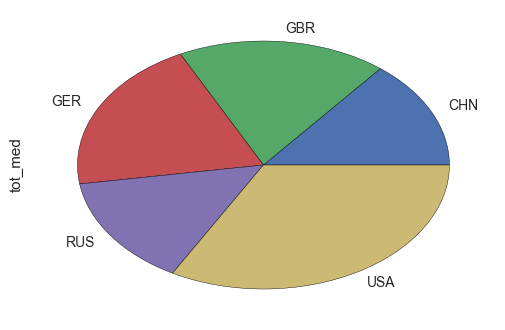

In [7]:
country_TM_100.plot(kind='pie')

## 6. Male weightlifting competitions are divided into 8 weight classes. Can you estimate these weight classes by looking at the data? Hint: Create a scatter plot with Body weight on the x-axis and choose height as y.

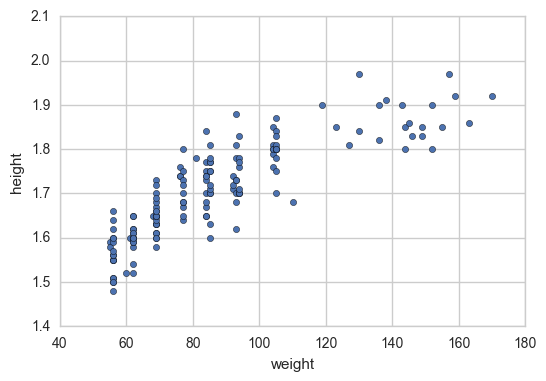

In [8]:
#athlete['sport']
athlete_male_WL=athlete[(athlete['sex']=='male')&(athlete['sport']=='weightlifting')].sort_values('weight')
#athlete_male_WL.plot(y='weight',kind='hist',bins=5)
athlete_male_WL.plot(y='height',x='weight',kind='scatter')
#athlete_grouped.plot(y='weight',kind='bar')
#athlete_grouped['weight'].plot(kind='bar')

## 7. Generate a histogram of male and female height distribution among all participants.

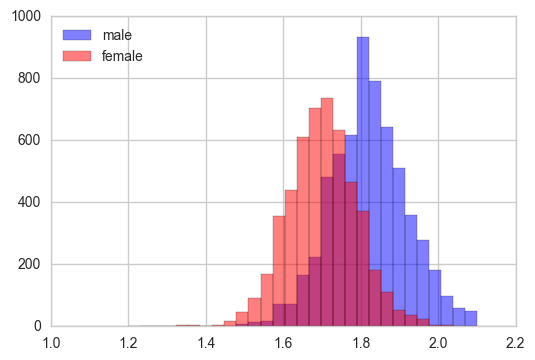

In [9]:
athlete_male=athlete[athlete['sex']=='male']
athlete_female=athlete[athlete['sex']=='female']
#athlete_male.plot(y='height',kind='hist',bins=10,color='g')
#athlete_female.plot(y='height',kind='hist',bins=10,color='r')
bins = np.linspace(1.2,2.1,30)

plt.pyplot.hist(athlete_male['height'], bins, alpha=0.5, label='male',color='b')
plt.pyplot.hist(athlete_female['height'], bins, alpha=0.5, label='female',color='r')
plt.pyplot.legend(loc='upper left')
plt.pyplot.show()

## 8. Using the Seaborn package create a box plot for male and female height distribution among all participants.

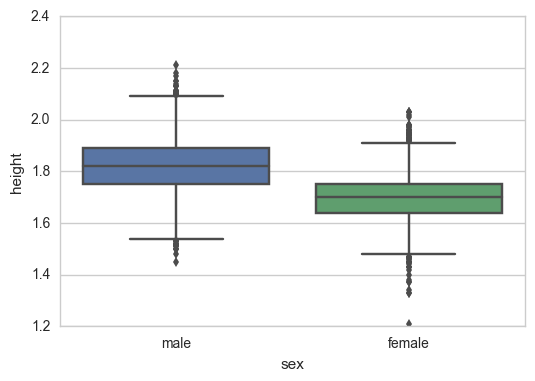

In [16]:
 import seaborn as sns
 sns.set_style("whitegrid")
 #tips = sns.load_dataset("tips")
 ax = sns.boxplot(x='sex', y='height',data=athlete)

## 9. Create a world map for countries and their respective amount of medals in Carto. [Carto](http://carto.com) provides a quick and easy way to create maps. For this you will also need to use 'countries.csv'.

In [ ]:
country_TM1=athlete.groupby('nationality')['tot_med'].sum().reset_index()
country_TM1=country_TM1.merge(countries, how='left' ,on='nationality')
country_TM1.to_csv('contry_medal.csv')

## 10. _Optional_: What else would you try?